In [1]:
# directoria de trabalho
setwd('');
# chamar pacotes survival, DBI (para ligar base-de-dados), ggplot2 (graficos)
library(survival);
library(DBI);
library(ggplot2);
library(plyr);
library(IRdisplay);

In [2]:
color_pallete_function <- colorRampPalette(
  colors = c("black","red","green3","blue" ,"cyan","orange"),
  space = "Lab");
num_colors=6;
colors <- color_pallete_function(num_colors);

# EKM de 3.º Golo Jogo com t_0=t_golo2

In [3]:
foot <- dbConnect(RSQLite::SQLite(), "foot.db");
sql = 'select id, diff, cens, caso, liga, odds from goal_3';
sec_goal <- dbGetQuery(foot, sql);
temp <- sec_goal$diff;
cens <- sec_goal$cens;
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2", "10"="2", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3", 
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5",
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));

In [4]:
ekm <- survfit(Surv(temp,cens) ~ liga);
quantile(ekm)$quantile;

25 50 75
liga=1 12 25 49
liga=2  9 22 42
liga=3 10 24 44
liga=4  9 20 41
liga=5 11 23 46
liga=6  9 21 42

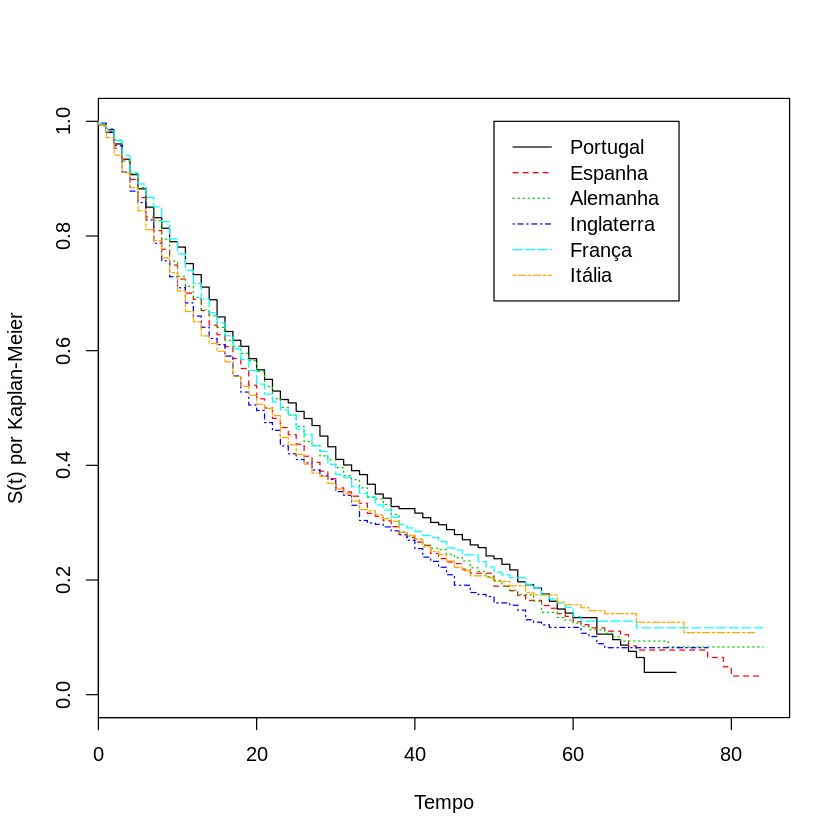

In [5]:
plot(ekm, lty=c(1,2,3,4,5,6), xlab="Tempo", ylab="S(t) por Kaplan-Meier", col=colors)
legend(50,1,lty=c(1,2,3,4,5,6),c("Portugal","Espanha","Alemanha","Inglaterra","França","Itália"),col=colors)

# EKM de 3.º Golo Jogo Marcado por Equipa de Casa com t_0=t_golo2

In [6]:
foot <- dbConnect(RSQLite::SQLite(), "foot.db");
sql <- 'select id, 
	   diff,
	   case when caso=2 and cens=0 then 0
	        when caso=2 and cens=1 then 0
			when caso=1 and cens=1 then 1
			when caso=1 and cens=0 then 0
	   end cens,
       liga, odds
from goal_3';
sec_goal_home <- dbGetQuery(foot, sql);
temp <- sec_goal_home$diff;
cens <- sec_goal_home$cens;
ligas <- factor(sec_goal_home$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2", "10"="2",
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3",
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5",
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));

In [7]:
ekm <- survfit(Surv(temp,cens) ~ liga);
quantile(ekm)$quantile;

25 50 75
liga=1 19 48 68
liga=2 16 36 66
liga=3 16 38 65
liga=4 15 37 NA
liga=5 17 38 NA
liga=6 15 36 NA

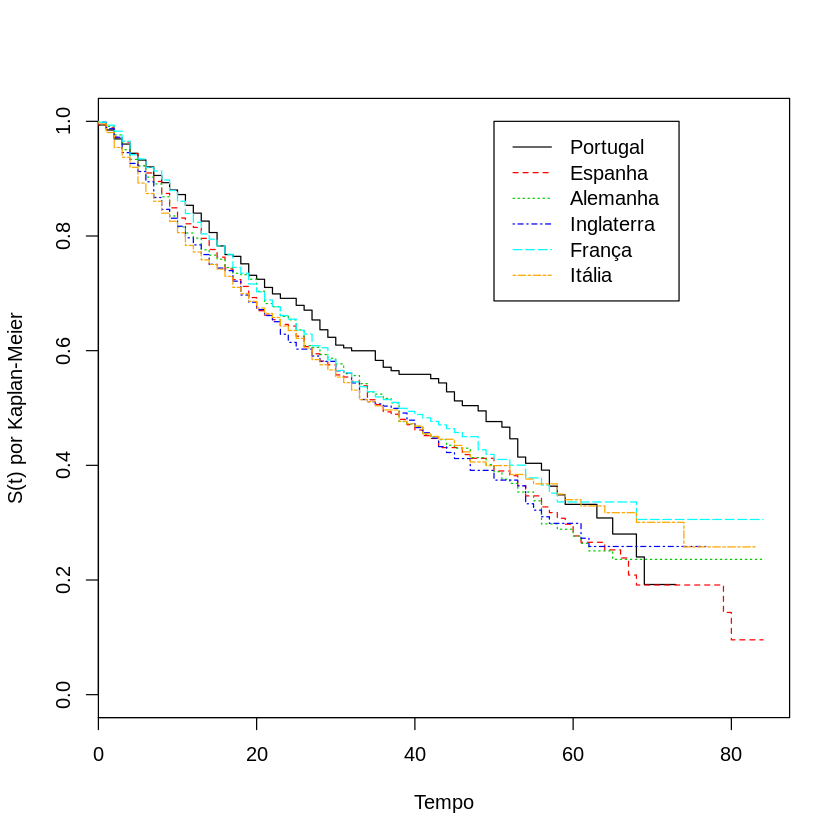

In [8]:
plot(ekm, lty=c(1,2,3,4,5,6), xlab="Tempo", ylab="S(t) por Kaplan-Meier", col=colors)
legend(50,1,lty=c(1,2,3,4,5,6),c("Portugal","Espanha","Alemanha","Inglaterra","França","Itália"),col=colors)

# EKM de 3.º Golo Jogo Marcado por Equipa de Fora com t_0=t_golo2

In [9]:
foot <- dbConnect(RSQLite::SQLite(), "foot.db");
sql <- 'select id, 
	   diff,
	   case when caso=2 and cens=0 then 0
	        when caso=2 and cens=1 then 1
			when caso=1 and cens=1 then 0
			when caso=1 and cens=0 then 0
	   end cens,
       liga, odds
from goal_3';
sec_goal_away <- dbGetQuery(foot, sql);
temp <- sec_goal_away$diff;
cens <- sec_goal_away$cens;
ligas <- factor(sec_goal_away$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2", "10"="2",
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3",
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5",
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));

In [10]:
ekm <- survfit(Surv(temp,cens) ~ liga);
quantile(ekm)$quantile;

25 50 75
liga=1 23 51 69
liga=2 22 50 NA
liga=3 24 55 NA
liga=4 19 45 NA
liga=5 24 55 NA
liga=6 22 54 NA

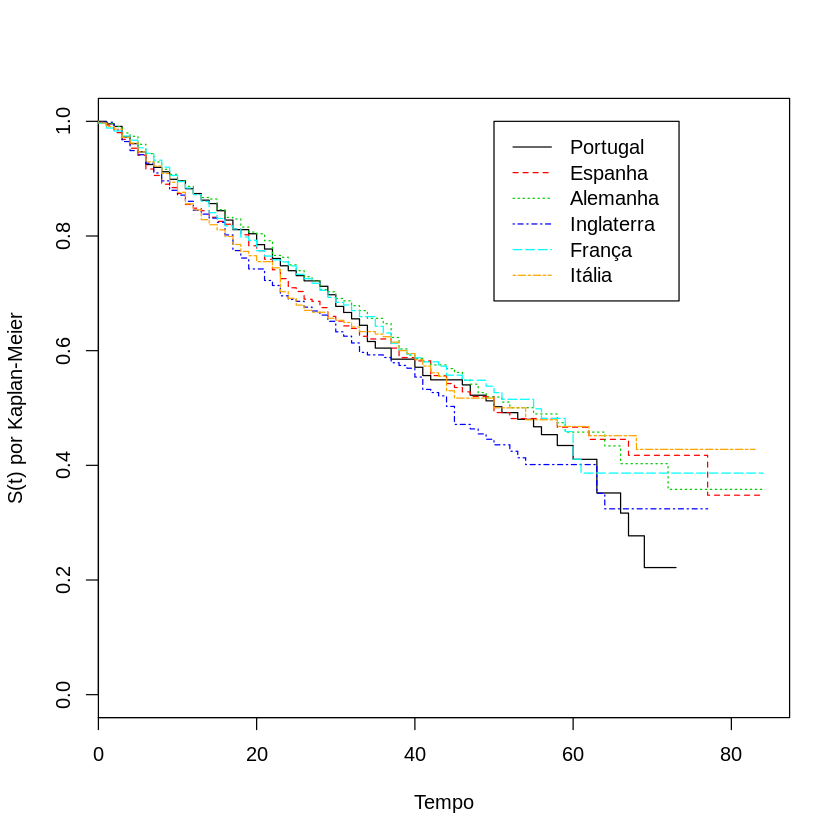

In [11]:
plot(ekm, lty=c(1,2,3,4,5,6), xlab="Tempo", ylab="S(t) por Kaplan-Meier", col=colors)
legend(50,1,lty=c(1,2,3,4,5,6),c("Portugal","Espanha","Alemanha","Inglaterra","França","Itália"),col=colors)

# Modelo de Cox

In [3]:
foot <- dbConnect(RSQLite::SQLite(), "foot.db");
sql = 'select id, diff, cens, caso, liga, odds from goal_3';
sec_goal <- dbGetQuery(foot, sql);
temp <- sec_goal$diff;
cens <- sec_goal$cens;
equip <- factor(sec_goal$caso);
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2", "10"="2",
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3",
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5",
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));
odds <- as.numeric(sec_goal$odds);

In [13]:
ekm <- survfit(Surv(temp,cens) ~ liga);
quantile(ekm)$quantile;

25 50 75
liga=1 12 25 49
liga=2  9 22 42
liga=3 10 24 44
liga=4  9 20 41
liga=5 11 23 46
liga=6  9 21 42

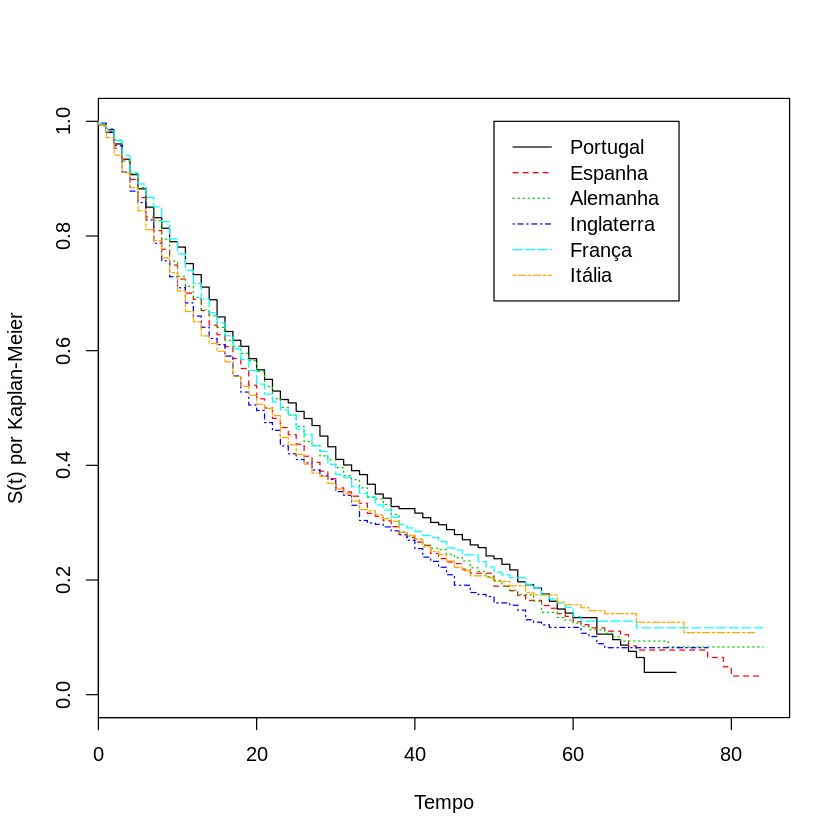

In [14]:
plot(ekm, lty=c(1,2,3,4,5,6), xlab="Tempo", ylab="S(t) por Kaplan-Meier", col=colors)
legend(50,1,lty=c(1,2,3,4,5,6),c("Portugal","Espanha","Alemanha","Inglaterra","França","Itália"),col=colors)

In [15]:
fit <- coxph(Surv(temp, cens) ~ equip + liga + odds, 
             method="breslow");
summary(fit);

Call:
coxph(formula = Surv(temp, cens) ~ equip + liga + odds, method = "breslow")

  n= 3634, number of events= 2444 

             coef  exp(coef)   se(coef)      z Pr(>|z|)    
equip2 -0.1487121  0.8618172  0.0410343 -3.624  0.00029 ***
liga2   0.0976758  1.1026053  0.0746328  1.309  0.19062    
liga3   0.0438257  1.0448003  0.0759715  0.577  0.56403    
liga4   0.1626785  1.1766584  0.0739379  2.200  0.02779 *  
liga5   0.0005056  1.0005058  0.0772742  0.007  0.99478    
liga6   0.0939290  1.0984817  0.0736268  1.276  0.20205    
odds   -0.0049501  0.9950622  0.0098231 -0.504  0.61432    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

       exp(coef) exp(-coef) lower .95 upper .95
equip2    0.8618     1.1603    0.7952     0.934
liga2     1.1026     0.9069    0.9526     1.276
liga3     1.0448     0.9571    0.9003     1.213
liga4     1.1767     0.8499    1.0179     1.360
liga5     1.0005     0.9995    0.8599     1.164
liga6     1.0985     0.9103    0.9509     1.2

In [16]:
rsch <- resid(fit, type="scaledsch");
summary(rsch);

       V1                V2                 V3                 V4          
 Min.   :-2.4357   Min.   :-8.30011   Min.   :-8.44960   Min.   :-7.99717  
 1st Qu.:-1.8927   1st Qu.:-0.01773   1st Qu.:-0.15810   1st Qu.: 0.08207  
 Median :-1.7662   Median : 0.11780   Median : 0.02407   Median : 0.14134  
 Mean   :-0.1487   Mean   : 0.09768   Mean   : 0.04383   Mean   : 0.16268  
 3rd Qu.: 2.2078   3rd Qu.: 0.24838   3rd Qu.: 0.26580   3rd Qu.: 0.30724  
 Max.   : 2.4687   Max.   : 6.39697   Max.   : 7.83663   Max.   : 6.10786  
       V5                  V6                 V7          
 Min.   :-8.550929   Min.   :-8.80178   Min.   :-0.52237  
 1st Qu.:-0.218782   1st Qu.:-0.01774   1st Qu.:-0.25813  
 Median :-0.030806   Median : 0.08647   Median :-0.13831  
 Mean   : 0.000506   Mean   : 0.09393   Mean   :-0.00495  
 3rd Qu.: 0.210616   3rd Qu.: 0.30202   3rd Qu.: 0.03445  
 Max.   : 7.990180   Max.   : 6.11458   Max.   : 5.45882  

           rho  chisq        p
equip2  0.0106  0.276 0.599495
liga2  -0.0247  1.493 0.221692
liga3  -0.0183  0.816 0.366219
liga4  -0.0320  2.487 0.114755
liga5  -0.0294  2.114 0.145999
liga6  -0.0682 11.351 0.000754
odds   -0.0257  1.630 0.201700
GLOBAL      NA 15.063 0.035198

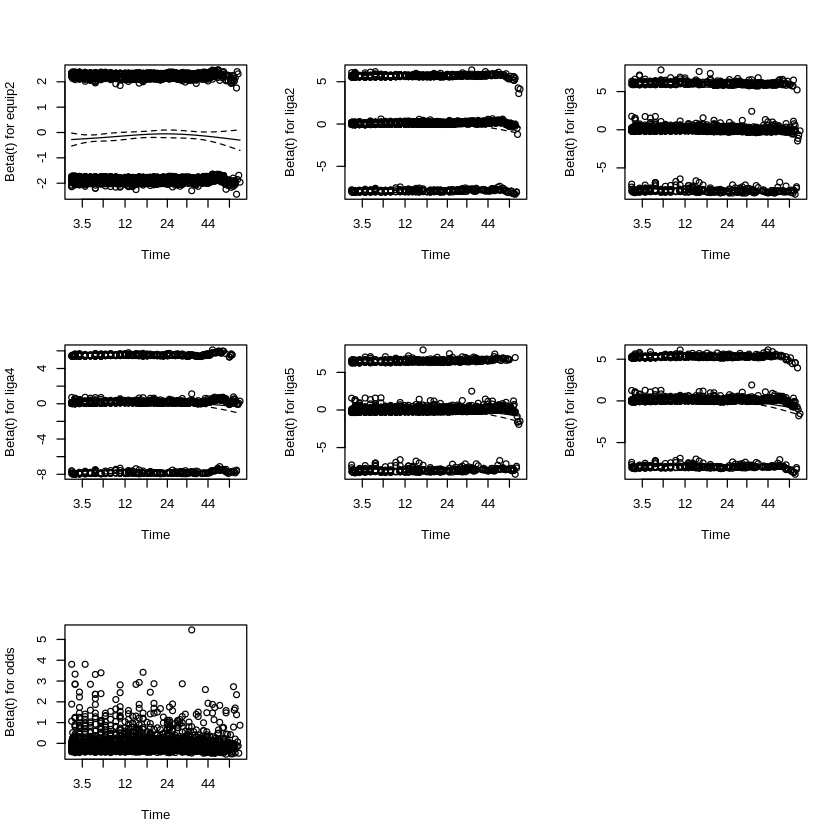

In [17]:
cox.zph(fit, transform="identity")
par(mfrow=c(3, 3))
plot(cox.zph(fit))

### Processo de Seleção de Variáveis do Modelo para 3.º Golo Casa (de 1-1 =>  2-1(caso1) ou 1-2(caso2))

##### retirar liga=5 e calcular TRV

In [4]:
#modelo inicial
fit <- coxph(Surv(temp, cens) ~ liga + odds, 
             method="breslow");
summary(fit);

Call:
coxph(formula = Surv(temp, cens) ~ liga + odds, method = "breslow")

  n= 3634, number of events= 2444 

           coef exp(coef)  se(coef)      z Pr(>|z|)  
liga2  0.104253  1.109881  0.074613  1.397   0.1623  
liga3  0.052249  1.053638  0.075929  0.688   0.4914  
liga4  0.164287  1.178553  0.073937  2.222   0.0263 *
liga5  0.008218  1.008252  0.077246  0.106   0.9153  
liga6  0.097511  1.102423  0.073622  1.324   0.1853  
odds  -0.005650  0.994365  0.009843 -0.574   0.5659  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

      exp(coef) exp(-coef) lower .95 upper .95
liga2    1.1099     0.9010    0.9589     1.285
liga3    1.0536     0.9491    0.9079     1.223
liga4    1.1786     0.8485    1.0196     1.362
liga5    1.0083     0.9918    0.8666     1.173
liga6    1.1024     0.9071    0.9543     1.274
odds     0.9944     1.0057    0.9754     1.014

Concordance= 0.52  (se = 0.007 )
Rsquare= 0.002   (max possible= 1 )
Likelihood ratio test= 8.09  on 6 df,   p=0.

In [5]:
#modelo no. 2: sem liga=5
ligas <- revalue(liga, c("5"="1"));
fit1 <- coxph(Surv(temp, cens) ~ ligas + odds, method="breslow");
TRV <- 2*(fit$loglik[2]-fit1$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 0.01132255

[1] 0.3781149

##### Como TRV < p-value então não existe significância estatística para afirmar que o modelo inicial é diferente do novo modelo. (reject null)

CONTINUAR PROCESSO DE SELEÇÃO DE VARIÁVEIS

In [6]:
summary(fit1)$coefficients;

coef         exp(coef) se(coef)    z          Pr(>|z|)   
ligas2  0.099746233 1.1048905 0.061372072  1.6252708 0.104104881
ligas3  0.047727590 1.0488849 0.062869284  0.7591559 0.447759281
ligas4  0.159780905 1.1732538 0.060548175  2.6389054 0.008317419
ligas6  0.092993824 1.0974550 0.060092907  1.5475008 0.121742522
odds   -0.005711974 0.9943043 0.009825656 -0.5813326 0.561016333

#####  retirar var=odds

In [7]:
#modelo no. 3: sem liga=5 e sem odds
fit2 <- coxph(Surv(temp, cens) ~ ligas, method="breslow");
TRV <- 2*(fit1$loglik[2]-fit2$loglik[2])
pvalue <- pchisq(0.95, 1)
TRV
pvalue

[1] 0.3432341

[1] 0.6702807

In [8]:
summary(fit2)$coefficients;

coef       exp(coef) se(coef)   z         Pr(>|z|)   
ligas2 0.09903504 1.104105  0.06136234 1.6139386 0.106540748
ligas3 0.04888620 1.050101  0.06283881 0.7779619 0.436591503
ligas4 0.15933424 1.172730  0.06054271 2.6317659 0.008494237
ligas6 0.09343858 1.097943  0.06008846 1.5550172 0.119941983

retirar ligas=3

In [12]:
ligas <- revalue(liga, c("3"="1"));
fit3 <- coxph(Surv(temp, cens) ~ ligas, method="breslow");
TRV <- 2*(fit1$loglik[2]-fit3$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 0.8483821

[1] 0.3781149

##### Como TRV < p-value então não existe significância estatística para afirmar que o modelo inicial é diferente do novo modelo. (do not reject null)

CONTINUAR PROCESSO DE SELEÇÃO DE VARIÁVEIS

In [ ]:
summary(fit2)$coefficients;

### retirar ligas=3

In [ ]:
#modelo no. 4: sem liga=5, sem var=odds e sem liga=3
liga <- revalue(ligas, c("3"="1"));
fit3 <- coxph(Surv(temp, cens) ~ liga, method="breslow");
TRV <- 2*(fit2$loglik[2]-fit3$loglik[2])
pvalue <- pchisq(0.95, 1)
TRV
pvalue

##### Como TRV < p-value então não existe significância estatística para afirmar que o modelo inicial é diferente do novo modelo. (do not reject null)

CONTINUAR PROCESSO DE SELEÇÃO DE VARIÁVEIS

In [ ]:
summary(fit3)$coefficients;

### retirar ligas=6

In [ ]:
#modelo no. 5: sem liga=5, sem var=odds, sem liga=3 e sem liga=6
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1","6"="2", "7"="2", "8"="2", "9"="2", "10"="2", "11"="1",
                         "12"="1", "13"="1", "14"="1", "15"="1", "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="1", "22"="1", "23"="1", "24"="1", "25"="1", "26"="1", "27"="1", "28"="1", "29"="1",
                         "30"="1"));
fit4 <- coxph(Surv(temp, cens) ~ liga, method="breslow");
TRV <- 2*(fit3$loglik[2]-fit4$loglik[2])
pvalue <- pchisq(0.95, 1)
TRV
pvalue

##### Como TRV > p-value então existe significância estatística para afirmar que o modelo inicial é diferente do novo modelo. (reject null)

PARA PROCESSO DE SELEÇÃO DE VARIÁVEIS usar modelo no. 4 com ligas=6
## repetindo coeficientes

In [ ]:
summary(fit3)$coefficients;

In [ ]:
betas_11_21 <- fit3$coefficients;
ht_11_21 <- basehaz(fit3, centered=F);
tempo_1 <- ht_11_21$time
H0_11_21 <- ht_11_21$hazard
S0_11_21 <- exp(-H0_11_21)
S1_11_21 <- S0_11_21^exp(0)
S4_11_21 <- S0_11_21^exp(betas_11_21[2])
plot(tempo_1, S1_11_21, lty=1, type="l", xlab="Tempo (minutos)", ylab="S(t|x)")
lines(c(0, tempo_1), c(1, S4_11_21), lty=2)
legend(40, 0.7, lty=c(1, 2), c("Ligas=base", "Ligas=Inglaterra"))

In [ ]:
Ht<-basehaz(fit3,centered=F)
l1=(Ht[2:dim(Ht)[1],1]-Ht[1:dim(Ht)[1]-1,1])/(Ht[2:dim(Ht)[1],2]-Ht[1:dim(Ht)[1]-1,2])
plot(tempo_1[1:length(tempo_1)-1],l1,lty=1,type="l",
     xlim=range(c(0,max(tempo_1))),xlab="Tempo em minutos",ylab="Taxa de Falha", 
     main="Taxa de Falha 1-1 => 2-1; t_0=golo2");

In [ ]:
surv2 <- survfit(fit3);
plot(surv2, fun="cumhaz", xlab="Tempo em minutos", ylab="Taxa de Falha Acumulada", 
     main="Taxa de Falha Acumulada 1-1 => 2-1");

### Modelo de Riscos Porporcionais de Cox - 3.º Golo Fora (de 1-1 para 2-1)    $t_0=golo2$

In [18]:
foot <- dbConnect(RSQLite::SQLite(), "foot.db");
sql <- 'select id, 
	   diff,
	   case when caso=2 and cens=0 then 0
	        when caso=2 and cens=1 then 0
			when caso=1 and cens=1 then 1
			when caso=1 and cens=0 then 0
	   end cens,
       liga, odds
from goal_3';
sec_goal <- dbGetQuery(foot, sql);
temp <- sec_goal$diff;
cens <- sec_goal$cens;
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1","6"="2",
                         "7"="2", "8"="2", "9"="2", "10"="2", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3",
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5",
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));
odds <- as.numeric(sec_goal$odds)

In [19]:
fit2 <- survfit(Surv(temp,cens) ~ liga);
quantile(fit2)$quantile;

25 50 75
liga=1 19 48 68
liga=2 16 36 66
liga=3 16 38 65
liga=4 15 37 NA
liga=5 17 38 NA
liga=6 15 36 NA

In [20]:
fit <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
summary(fit);

Call:
coxph(formula = Surv(temp, cens) ~ liga + odds, method = "breslow")

  n= 3634, number of events= 1418 

           coef exp(coef)  se(coef)     z Pr(>|z|)  
liga2 1.823e-01 1.200e+00 9.944e-02 1.834   0.0667 .
liga3 1.624e-01 1.176e+00 1.005e-01 1.616   0.1062  
liga4 2.001e-01 1.222e+00 9.945e-02 2.013   0.0442 *
liga5 7.200e-02 1.075e+00 1.032e-01 0.698   0.4852  
liga6 1.736e-01 1.190e+00 9.825e-02 1.767   0.0772 .
odds  1.988e-06 1.000e+00 1.265e-02 0.000   0.9999  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

      exp(coef) exp(-coef) lower .95 upper .95
liga2     1.200     0.8333    0.9875     1.458
liga3     1.176     0.8501    0.9660     1.433
liga4     1.222     0.8186    1.0052     1.484
liga5     1.075     0.9305    0.8779     1.315
liga6     1.190     0.8406    0.9812     1.442
odds      1.000     1.0000    0.9755     1.025

Concordance= 0.519  (se = 0.009 )
Rsquare= 0.002   (max possible= 0.997 )
Likelihood ratio test= 6.25  on 6 df,   p=0.4


### 6.4.2.1) Processo de Seleção de Variáveis Modelo de - 3.º Golo Casa (de 1-1 para 2-1)   $t_0=golo2$

## RETIRAR odds

In [21]:
fit1 <- coxph(Surv(temp, cens) ~ liga, method="breslow");
TRV <- 2*(fit$loglik[2]-fit1$loglik[2])
pvalue <- pchisq(0.95, 1)
TRV
pvalue

[1] 2.494926e-08

[1] 0.6702807

### PARAR PROCESSO
# modelo com var=odds

In [22]:
summary(fit)[7]$coefficients;

coef         exp(coef) se(coef)   z            Pr(>|z|)  
liga2 1.823312e-01 1.200012  0.09944248 1.8335340853 0.06672318
liga3 1.624387e-01 1.176376  0.10054164 1.6156358345 0.10617307
liga4 2.001497e-01 1.221586  0.09945204 2.0125248274 0.04416464
liga5 7.200089e-02 1.074656  0.10316651 0.6979095175 0.48523378
liga6 1.736221e-01 1.189606  0.09825453 1.7670644167 0.07721744
odds  1.988017e-06 1.000002  0.01264677 0.0001571956 0.99987458

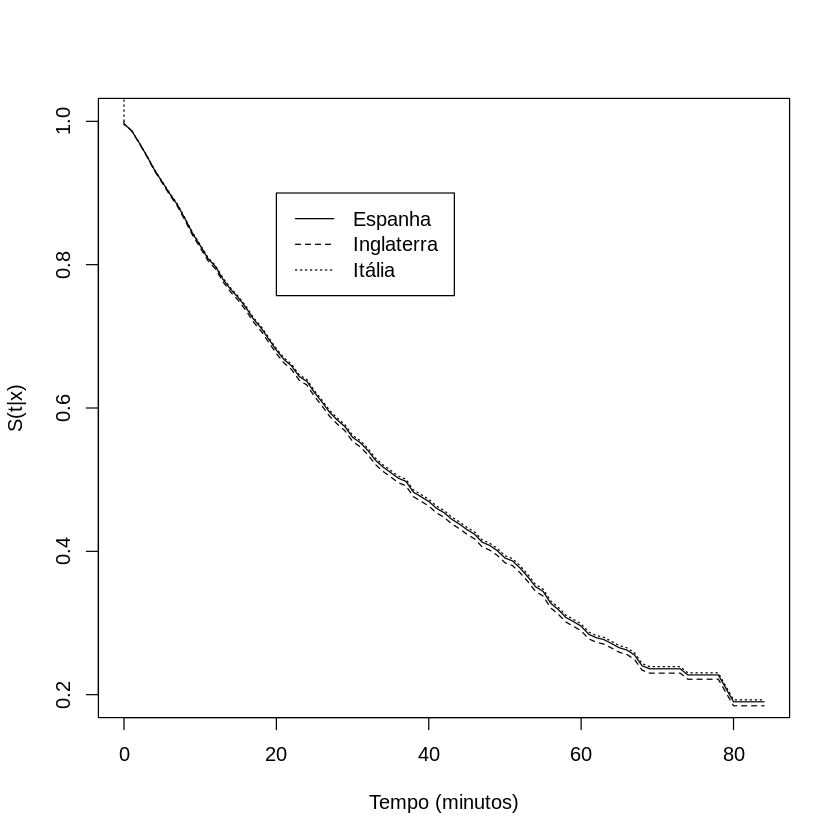

In [23]:
betas_11_21 <- fit$coefficients
ht_11_21 <- basehaz(fit, centered=F);
tempo_1 <- ht_11_21$time
H0_11_21 <- ht_11_21$hazard
S0_11_21 <- exp(-H0_11_21)
S1_11_21 <- S0_11_21^exp(betas_11_21[1])
S2_11_21 <- S0_11_21^exp(betas_11_21[3])
S5_11_21 <- S0_11_21^exp(betas_11_21[5])
plot(tempo_1, S1_11_21, lty=1, type="l", xlab="Tempo (minutos)", ylab="S(t|x)", ylim=c(0.20, 1))
lines(c(0, tempo_1), c(1, S2_11_21), lty=2)
lines(c(0, tempo_1), c(2, S5_11_21), lty=3)
legend(20, 0.9, lty=c(1, 2, 3), c("Espanha", "Inglaterra", "Itália"))

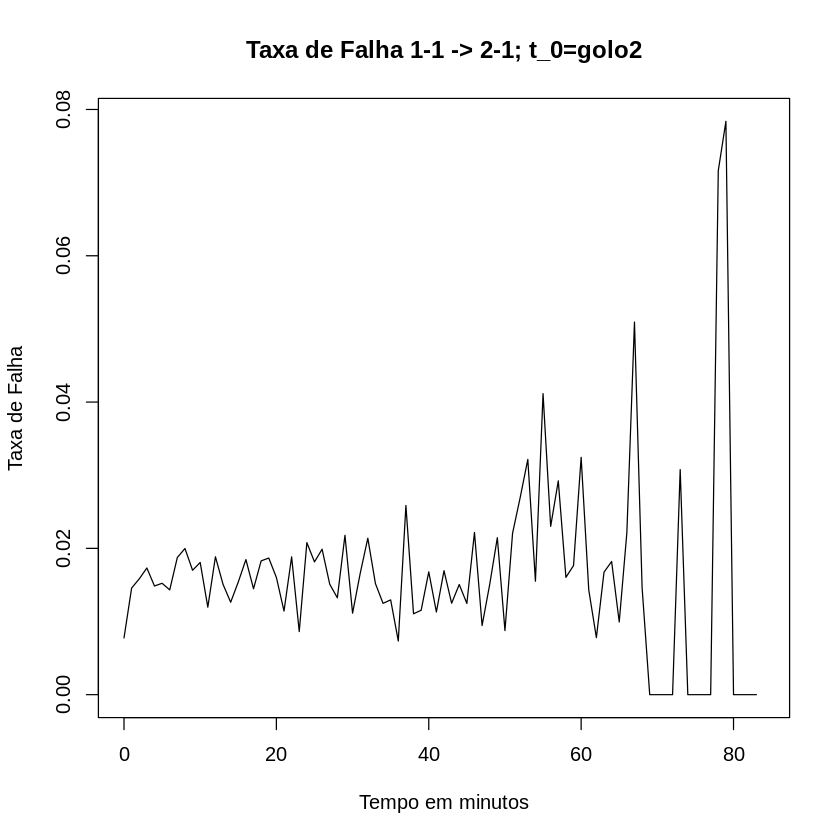

In [25]:
Ht<-basehaz(fit,centered=F)
l1=(Ht[2:dim(Ht)[1],1]-Ht[1:dim(Ht)[1]-1,1])/(Ht[2:dim(Ht)[1],2]-Ht[1:dim(Ht)[1]-1,2])
plot(tempo_1[1:length(tempo_1)-1],l1,lty=1,type="l",
     xlim=range(c(0,max(tempo_1))),xlab="Tempo em minutos",ylab="Taxa de Falha", 
     main="Taxa de Falha 1-1 => 2-1");

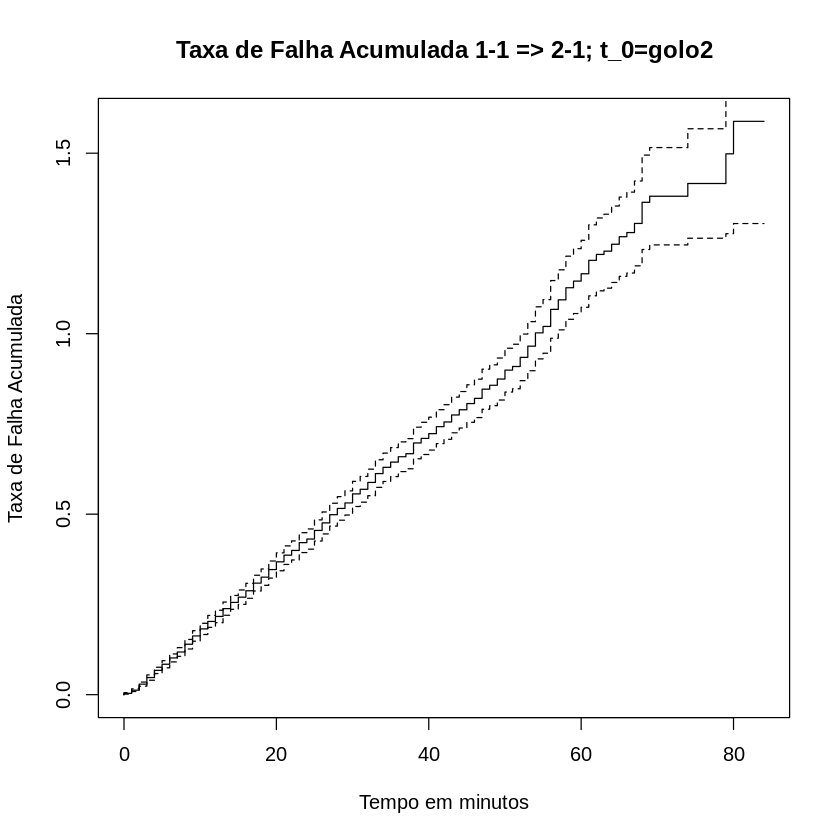

In [26]:
surv2 <- survfit(fit);
plot(surv2, fun="cumhaz", xlab="Tempo em minutos", ylab="Taxa de Falha Acumulada", 
     main="Taxa de Falha Acumulada 1-1 => 2-1; t_0=golo2");

### 6.4.2) Modelo de Riscos Porporcionais de Cox - 3.º Golo Fora  (de 1-1 para 1-2) t_0=golo2

In [27]:
foot <- dbConnect(RSQLite::SQLite(), "foot.db");
sql <- 'select id, 
	   diff,
	   case when caso=2 and cens=0 then 0
	        when caso=2 and cens=1 then 1
			when caso=1 and cens=1 then 0
			when caso=1 and cens=0 then 0
	   end cens,
       liga, odds
from goal_3';
sec_goal <- dbGetQuery(foot, sql);
temp <- sec_goal$diff;
cens <- sec_goal$cens;
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1","6"="2", "7"="2", "8"="2", "9"="2", "10"="2", "11"="3",
                         "12"="3", "13"="3", "14"="3", "15"="3", "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", "26"="6", "27"="6", "28"="6", "29"="6",
                         "30"="6"));
odds <- as.numeric(sec_goal$odds)
fit <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
summary(fit);
fit2 <- survfit(Surv(temp,cens) ~ liga);
quantile(fit2)$quantile;

Call:
coxph(formula = Surv(temp, cens) ~ liga + odds, method = "breslow")

  n= 3634, number of events= 1026 

           coef exp(coef)  se(coef)      z Pr(>|z|)
liga2  0.001475  1.001476  0.113110  0.013    0.990
liga3 -0.097744  0.906881  0.116333 -0.840    0.401
liga4  0.119282  1.126688  0.110590  1.079    0.281
liga5 -0.074089  0.928589  0.116691 -0.635    0.525
liga6 -0.002083  0.997919  0.111385 -0.019    0.985
odds  -0.013874  0.986221  0.015660 -0.886    0.376

      exp(coef) exp(-coef) lower .95 upper .95
liga2    1.0015     0.9985    0.8023     1.250
liga3    0.9069     1.1027    0.7220     1.139
liga4    1.1267     0.8876    0.9071     1.399
liga5    0.9286     1.0769    0.7387     1.167
liga6    0.9979     1.0021    0.8022     1.241
odds     0.9862     1.0140    0.9564     1.017

Concordance= 0.52  (se = 0.01 )
Rsquare= 0.002   (max possible= 0.984 )
Likelihood ratio test= 5.74  on 6 df,   p=0.5
Wald test            = 5.78  on 6 df,   p=0.4
Score (logrank) test = 5.79  o

25 50 75
liga=1 23 51 69
liga=2 22 50 NA
liga=3 24 55 NA
liga=4 19 45 NA
liga=5 24 55 NA
liga=6 22 54 NA

In [ ]:
rsch <- resid(fit, type="scaledsch")
summary(rsch);

In [ ]:
cox.zph(fit, transform="identity");
par(mfrow=c(3, 2));
plot(cox.zph(fit));

### 6.4.2.1) Processo de Seleção de Variáveis Modelo de - 3.º Golo Casa (de 1-1 para 1-2) t_0=golo2

## retirar ligas=2

In [29]:
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="1", "7"="1", "8"="1", "9"="1", "10"="1",
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3",
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5",
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));
fit1 <- coxph(Surv(temp, cens) ~ ligas + odds, method="breslow");
TRV <- 2*(fit1$loglik[2]-fit$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 7.874691

[1] 0.3781149

## PARAR PROCESSO
### manter ligas=2

In [30]:
summary(fit)[7]$coefficients;

coef         exp(coef) se(coef)   z           Pr(>|z|) 
liga2  0.001474560 1.0014756 0.11310991  0.01303652 0.9895987
liga3 -0.097744463 0.9068806 0.11633350 -0.84020911 0.4007912
liga4  0.119282274 1.1266879 0.11058964  1.07860259 0.2807649
liga5 -0.074089442 0.9285886 0.11669056 -0.63492233 0.5254791
liga6 -0.002083075 0.9979191 0.11138511 -0.01870155 0.9850792
odds  -0.013874335 0.9862215 0.01565972 -0.88598871 0.3756236

##### Como TRV > p-value então existe significância estatística para afirmar que o modelo inicial é diferente do novo modelo. (reject null)

PARAR PROCESSO DE SELEÇÃO DE VARIÁVEIS => usar modelo inicial mas retirando ligas=6 e ligas=2   => (fit2)

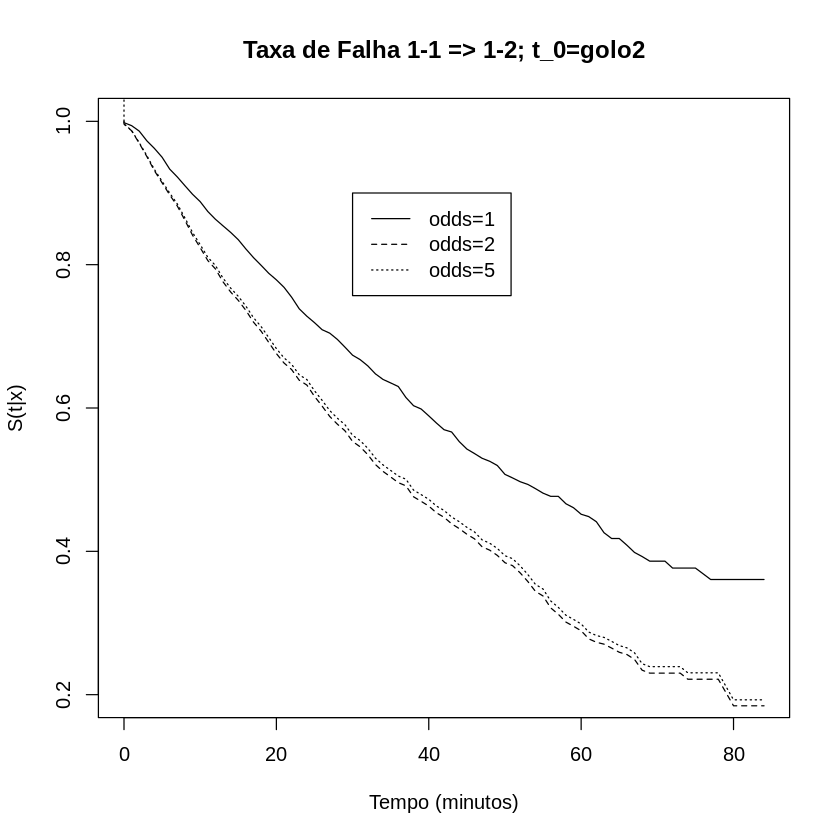

In [31]:
betas_11_12 <- fit$coefficients
ht_11_12 <- basehaz(fit, centered=F);
tempo_2 <- ht_11_12$time
H0_11_12 <- ht_11_12$hazard
S0_11_12 <- exp(-H0_11_12)
S1_11_12 <- S0_11_12^exp(betas_11_12[4])
S2_11_12 <- S0_11_12^exp(betas_11_12[4]*2)
S5_11_12 <- S0_11_12^exp(betas_11_12[4]*5)
plot(tempo_2, S1_11_12, lty=1, type="l", xlab="Tempo (minutos)", ylab="S(t|x)", ylim=c(0.20, 1),
    main="Taxa de Falha 1-1 => 1-2; t_0=golo2")
lines(c(0, tempo_2), c(1, S2_11_21), lty=2)
lines(c(0, tempo_2), c(2, S5_11_21), lty=3)
legend(30, 0.9, lty=c(1, 2, 3), c("odds=1", "odds=2", "odds=5"))

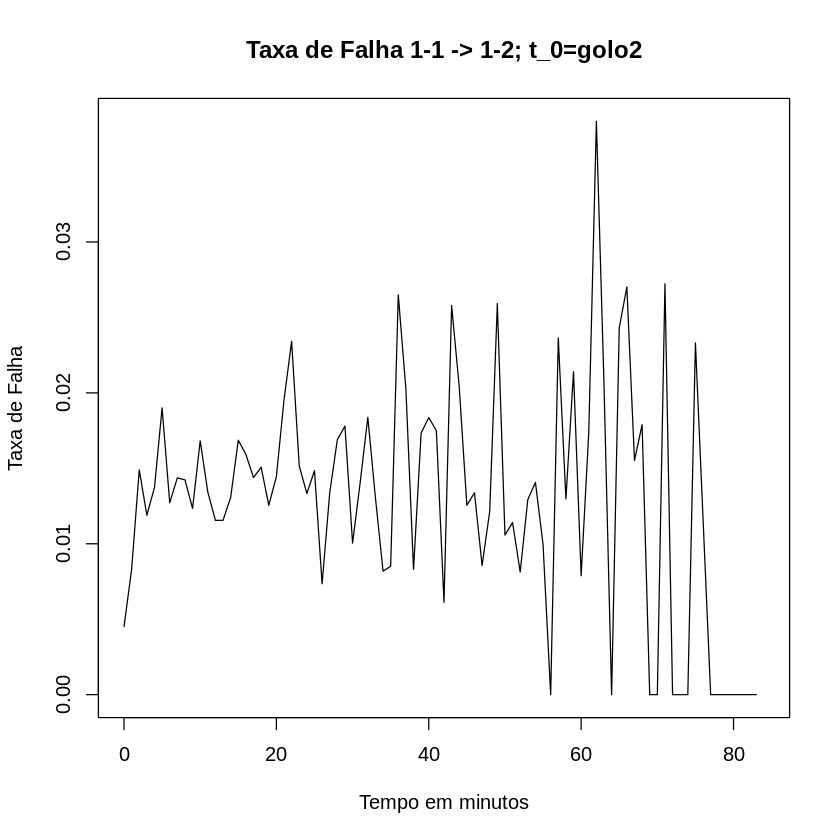

In [32]:
Ht<-basehaz(fit,centered=F)
l2=(Ht[2:dim(Ht)[1],1]-Ht[1:dim(Ht)[1]-1,1])/(Ht[2:dim(Ht)[1],2]-Ht[1:dim(Ht)[1]-1,2])
plot(tempo_2[1:length(tempo_2)-1],l2,lty=1,type="l",
     xlim=range(c(0,max(tempo_2))),xlab="Tempo em minutos",ylab="Taxa de Falha", 
     main="Taxa de Falha 1-1 -> 1-2; t_0=golo2");

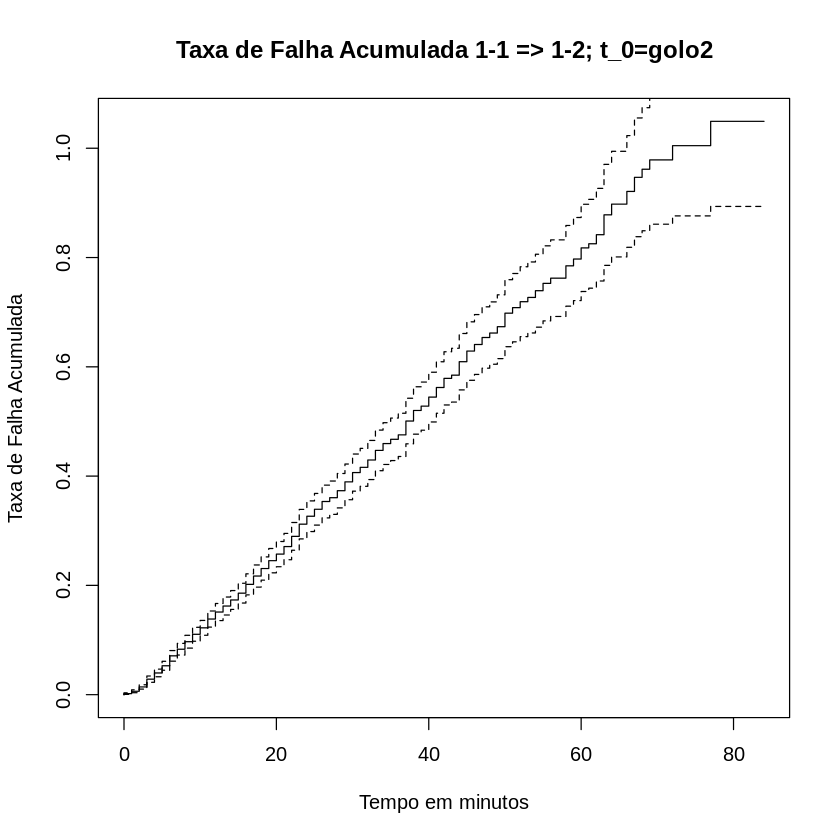

In [33]:
surv2 <- survfit(fit);
plot(surv2, fun="cumhaz", xlab="Tempo em minutos", ylab="Taxa de Falha Acumulada", 
     main="Taxa de Falha Acumulada 1-1 => 1-2; t_0=golo2");

# 6.5) Comparação de Taxas de Falha (1-1=>2-1 vs. 1-1=>1-2) $t_0=golo2$

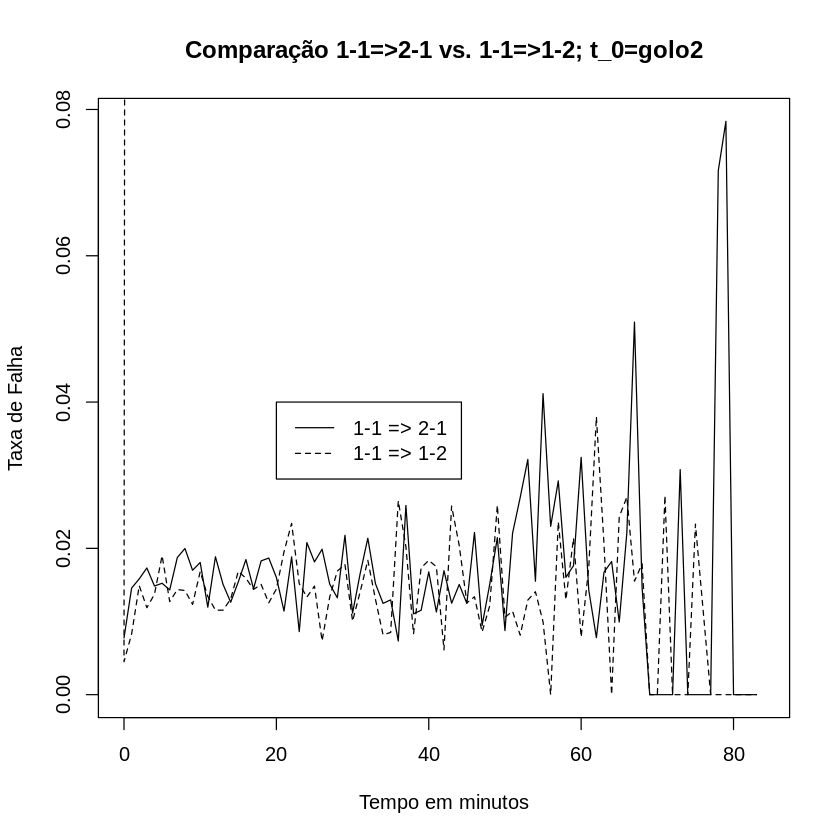

In [34]:
plot(tempo_1[1:length(tempo_1)-1],l1,lty=1,type="l",
     xlim=range(c(0,max(tempo_1))),xlab="Tempo em minutos",ylab="Taxa de Falha", 
     main="Comparação 1-1=>2-1 vs. 1-1=>1-2; t_0=golo2");
lines(c(1, tempo_2[1:length(tempo_2)-1]), c(1, l2), lty=2)
legend(20, 0.04, lty=c(1, 2), c("1-1 => 2-1", "1-1 => 1-2"));